<a href="https://colab.research.google.com/github/bhattronak/Google_Colaboratory_Work/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [74]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [75]:
len(X_train)

60000

In [76]:
len(X_test)

10000

In [77]:
X_test[0].shape

(28, 28)

In [78]:
X_train[0].shape

(28, 28)

In [79]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

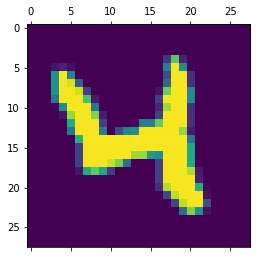

In [80]:
plt.matshow(X_train[20])


In [81]:
y_train[20]

4

In [82]:
X_train_reshape=X_train.reshape(len(X_train),28*28)


In [83]:
X_test_reshape = X_test.reshape(len(X_test), 28*28)

In [84]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data

In [85]:
scaler1 = MinMaxScaler()
X_train_min = scaler1.fit_transform(X_train_reshape)


In [86]:
X_test_min= scaler1.fit_transform(X_test_reshape)

In [87]:
X_train_min[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [88]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_min, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4650 - accuracy: 0.8795
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9253


In [89]:
model.evaluate(X_test_reshape, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 47.9882 - accuracy: 0.9113


[47.98823928833008, 0.911300003528595]

In [90]:

y_predicted = model.predict(X_test_reshape)
y_predicted[128]


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.9442761e-16, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00], dtype=float32)

model prediction:
5
actual image:


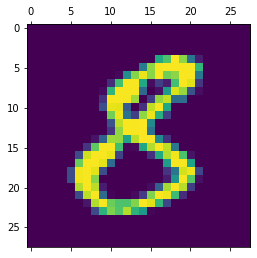

In [91]:
from numpy.core.fromnumeric import argmax
print('model prediction:')
print(argmax(y_predicted[1234]))
print('actual image:')
plt.matshow(X_test[1234])
plt.show()

In [92]:
#---------------------------------------------------------------------------

In [93]:
model2 = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_min, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2071 - accuracy: 0.9412
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0756 - accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0330 - accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0256 - accuracy: 0.9917


In [94]:
model2.evaluate(X_test_min,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0600 - accuracy: 0.9831


[0.05997571349143982, 0.9830999970436096]

Model2 pridiction:
8
Actual image:


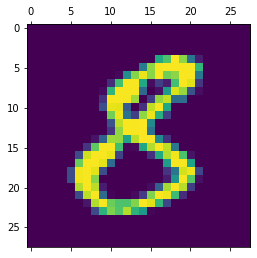

In [95]:
y_predicted2 = model2.predict(X_test_min)
print('Model2 pridiction:')
print(argmax(y_predicted2[1234]))
print('Actual image:')
plt.matshow(X_test[1234])
plt.show()

#Compare model & model2